In [27]:
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def mean(list):
    sum = 0.0
    
    for i in list:
        sum = sum + i 
        
    return sum/len(list)

def rms(list):
    meanOfList = mean(list)
    Dsum = 0.0
    
    for i in list:
        Dsum = Dsum + (meanOfList - i)**2
        
    return m.sqrt(Dsum/len(list))

def fun(x,y,z):
    return ((x**2)/(1**2))+((y**2)/(1.5**2))+((z**2)/(2**2))



def monte_carlo_volume(fun,N,Xl,Xh,Yl,Yh,Zl,Zh):
    vol_box = (Xh-Xl) * (Yh-Yl) * (Zh-Zl)
    inPoints =[]
    for i in range(N):
        point = (random.uniform(Xl,Xh),random.uniform(Yl, Yh),random.uniform(Zl,Zh))

        if (fun(*point) <= 1):
            inPoints.append(point)
    Volume = (vol_box/float(N)) * len(inPoints)
    return Volume,inPoints



def volumeVsN(analyt_val):
    meanVolumeAndN = []
    frac_errAndN = []
    analyt_valAndN = []
    for step in range(100,50000,1000):
        volumes =[]
        for t in range(10):
            volume,inPoints = monte_carlo_volume(fun,step,-1,1,-1.5,1.5,-2,2)
            volumes.append(volume)
        meanVolume = mean(volumes)
        frac_err = abs(meanVolume - analyt_val)/analyt_val
        analyt_valAndN.append((step,analyt_val))
        meanVolumeAndN.append((step,meanVolume))
        frac_errAndN.append((step,frac_err))
    
    return meanVolumeAndN,analyt_valAndN,frac_errAndN

        
        
        
            
            
            




In [16]:
meanVolumeAndN,analyt_value,frac_errAndN = volumeVsN(12.56637)

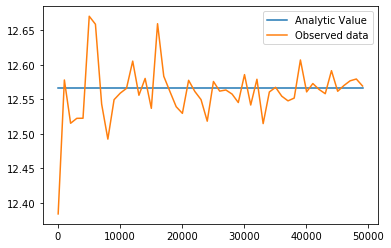

In [28]:

plt.plot(*zip(*analyt_value),label="Analytic Value")
plt.plot(*zip(*meanVolumeAndN),label="Observed data")
plt.legend()
plt.show()

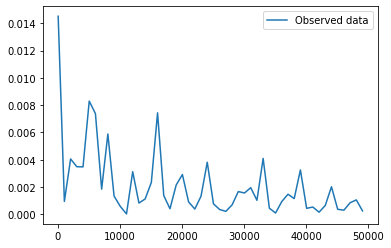

In [37]:

plt.plot(*zip(*frac_errAndN),label="Fractional error")
plt.legend()
plt.show()

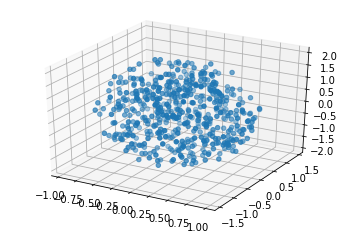

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
volume,inPoints = monte_carlo_volume(fun,1000,-1,1,-1.5,1.5,-2,2)
ax.scatter(*zip(*inPoints))
plt.show()